In [15]:
import requests
#helps in http request
# import simplejson
import json as simplejson
#used or json handling , better than json as it gives specific error code for incompatible json
import re
#used for string operations
import operator
#used for numerical operations
import sys
#used for system calls
import urllib
#used to get or push http url requests
import os
#used for instructing os to perform functions on file system
import csv
#handle csv files
import numpy as np
#used for scientific calculation
from sklearn.svm import SVR
#used for ml
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


#INPUT THE COMPANY NAME
if(len(sys.argv)<2):
	print('invalid string')
	exit()
    
query=sys.argv[1]

In [16]:
# #ACCESS THE YAHOO FINANACE URL FOR STOCK CODE
# yahoo_stock_code="http://d.yimg.com/autoc.finance.yahoo.com/autoc?query="
# yahoo_excess_code="&region=1&lang=en"
# stock_url=yahoo_stock_code+query+yahoo_excess_code
# response=requests.get(stock_url)

# #CONEVRT THE JSON FILE INTO UTF-8 FORMAT FOR PARSING
# data=simplejson.loads(response.content.decode("utf-8"))

# #FETCH THE FIRST COMPANY CODE
# code=data['ResultSet']['Result'][0]['symbol']
# print(code)

# #ACCESS THE YAHOO FINANACE API FOR DOWNLOADING THE DATA
# base_url = "http://ichart.finance.yahoo.com/table.csv?s="
# dataset_url=base_url+code

# #CREATE PATH FOR THE DOWNLOADED FILE
# output_path="C:/ml/stock_prediction/"
# output_path_new=output_path+code+"_new.csv"
# output_path=output_path+code+".csv"


# #USE URLLIB FOR THE DATA FILE DOWNLOAD
# try:
# 	urllib.urlretrieve(dataset_url,output_path)
# except urllib.ContentTooShortError as p:
# 	outfile=open(output_path,"w")
# 	outfile.write(p.content)
# 	outfile.close()
	

# #WRITE THE FIRST i LINES OF DATA INTO A NEW FILE 
# a=open(output_path,"rb")
# b=open(output_path_new,"wb")
# reader=csv.reader('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv',delimiter=',')
# # f=csv.writer(b)

# i=1
# for line in reader:
# 	if i>20:
# 		break
# 	else:
# 		f.writerow(line)
# 		i=i+1	




# a.close()
# b.close()
# os.remove(output_path)

In [17]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()

False

In [18]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [19]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()

Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [20]:
# convert the date column into a time series with daily frequency

df['Date'] = pd.to_datetime(df['Date'])

In [21]:
indexed_df = df.set_index('Date')

In [22]:
ts = indexed_df['Close']

In [23]:
ts.head()

Date
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
Name: Close, dtype: float64

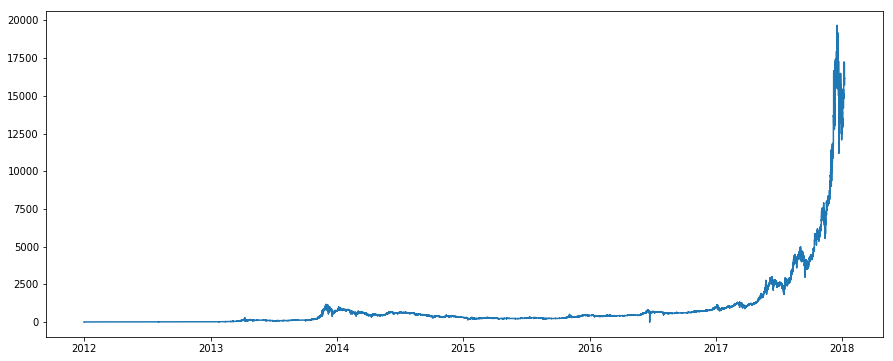

In [24]:
# visualize the time series to see how Bitcoin changes over time

plt.plot(ts)

In [25]:
# resamply by week

ts_week = ts.resample('W').mean()

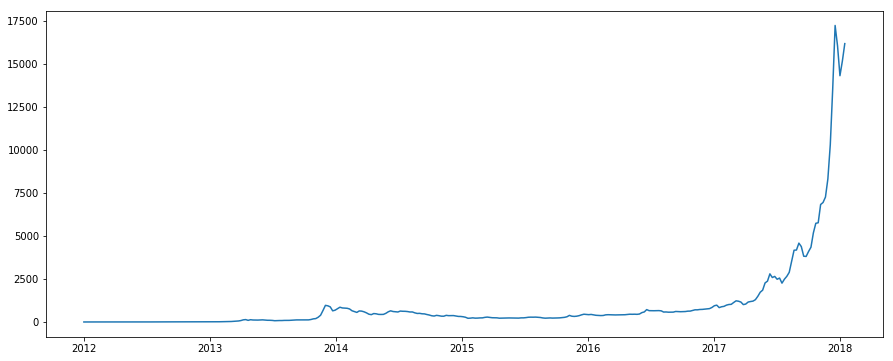

In [26]:
plt.plot(ts_week)

In [31]:
#COVERT THE DATA INTO TWO ARRAYS OF DATE AND PRICE

date=df['Date']
price=df['Close']

# with open(output_path_new) as datasource:
# 	r=csv.reader(datasource)
# 	next(r)
# 	for row in r:
# 		date.append(int(row[0].split('-')[2]))
# 		price.append(float(row[1]))

#reshape the date array into the numpy array of nX1
date=np.reshape(date,(len(date),1))
print(date)
#print(date)
#print(price)

[['2011-12-31T00:00:00.000000000']
 ['2011-12-31T00:00:00.000000000']
 ['2011-12-31T00:00:00.000000000']
 ...
 ['2018-01-07T00:00:00.000000000']
 ['2018-01-07T00:00:00.000000000']
 ['2018-01-08T00:00:00.000000000']]


/home/rahulworld/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [ ]:
#DATA PREDICTION
#initialise svr, fit the models, predidct the model values
#kernel specifies the kernel type used in algorithm
#C is the error penalty
#gamma is the kernel coefficient
#degree is the polynomial degree in poly kernel



svr_lin=SVR(kernel='linear',C=1e3)
svr_poly=SVR(kernel='poly',C=1e3,degree=2)
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)

svr_lin.fit(date,price)
svr_poly.fit(date,price)
svr_rbf.fit(date,price)



#PLOT THE DATA ON THE GRAPH

matplt.scatter(date,price,color='black',label='data')
matplt.plot(date,svr_lin.predict(date),color='blue',label='Linear SVR')
matplt.plot(date,svr_poly.predict(date),color='red',label='Polynomial SVR')
matplt.plot(date,svr_rbf.predict(date),color='green',label='RBF SVR')
matplt.xlabel('Dates')
matplt.ylabel('Price')
matplt.title('Support Vector Regression')
matplt.legend()
matplt.show()

svr_lin.predict(10)[0]
svr_poly.predict(10)[0]
svr_rbf.predict(10)[0]



os.remove(output_path_new)
print('prediction over')

In [16]:
# df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'], usecols=['Date','Close'])
# df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv', parse_dates=['Timestamp'], usecols=['Timestamp','Close'])
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()

False

In [17]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [19]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()

Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [20]:
# convert the date column into a time series with daily frequency

df['Date'] = pd.to_datetime(df['Date'])

In [21]:
indexed_df = df.set_index('Date')

In [22]:
ts = indexed_df['Close']

In [23]:
ts.head()

Date
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
2011-12-31    4.39
Name: Close, dtype: float64

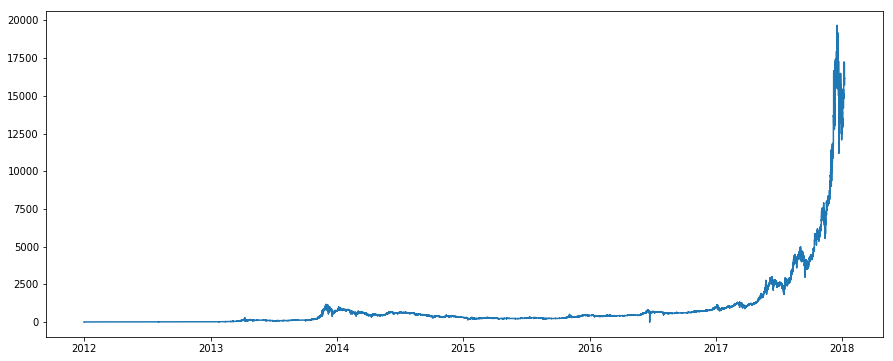

In [24]:
# visualize the time series to see how Bitcoin changes over time

plt.plot(ts)

In [25]:
# resamply by week

ts_week = ts.resample('W').mean()

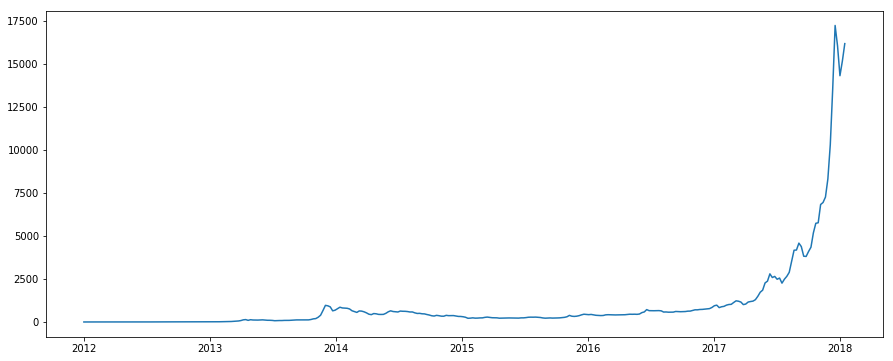

In [26]:
plt.plot(ts_week)

In [27]:
# check for stationarity

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

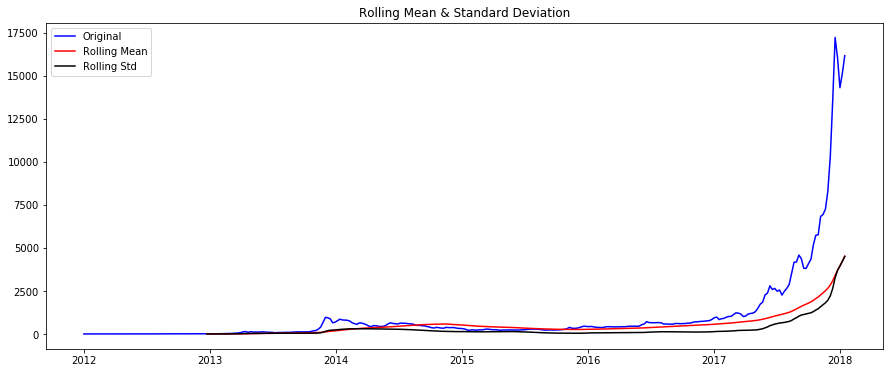

Results of Dickey-Fuller Test:
Test Statistic                   3.544263
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [28]:
test_stationarity(ts_week)

Because the test statistic is more than the 5% critical value and the p-value is larger than 0.05, the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the weekly time series is not stationary.
Before you can apply ARIMA models for forecasting, you need to transform this time series into a stationary time series.

In [29]:
# apply a non linear log transform

ts_week_log = np.log(ts_week)

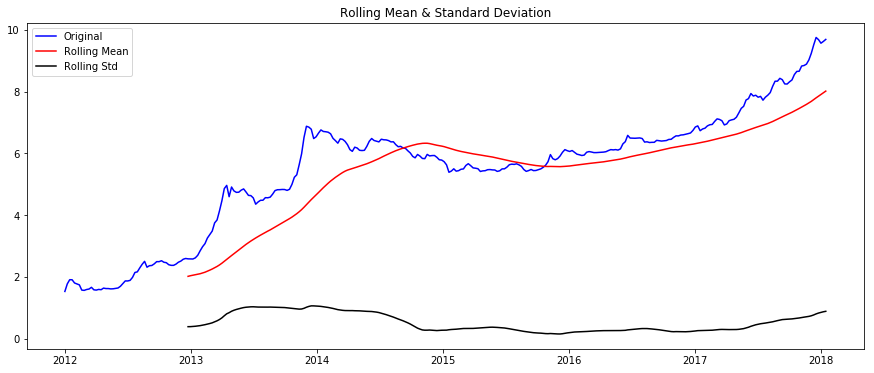

Results of Dickey-Fuller Test:
Test Statistic                  -0.202453
p-value                          0.938229
#Lags Used                       1.000000
Number of Observations Used    314.000000
Critical Value (1%)             -3.451349
Critical Value (5%)             -2.870789
Critical Value (10%)            -2.571698
dtype: float64


In [30]:
test_stationarity(ts_week_log)

The Dickey-Fuller test results confirm that the series is still non-stationary. Again the test statistic is larger than the 5% critical value and the p-value larger than 0.05.

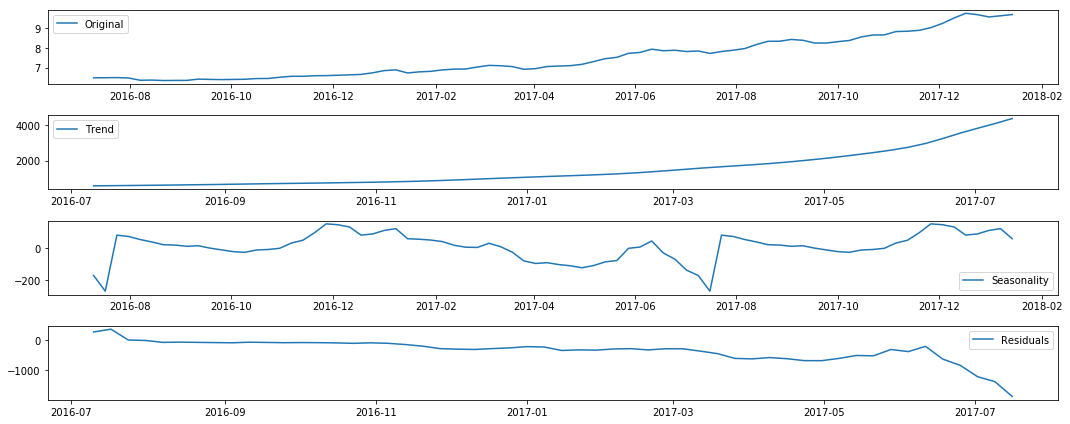

In [31]:
# remove trend and seasonality with decomposition

decomposition = seasonal_decompose(ts_week)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_week_log[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

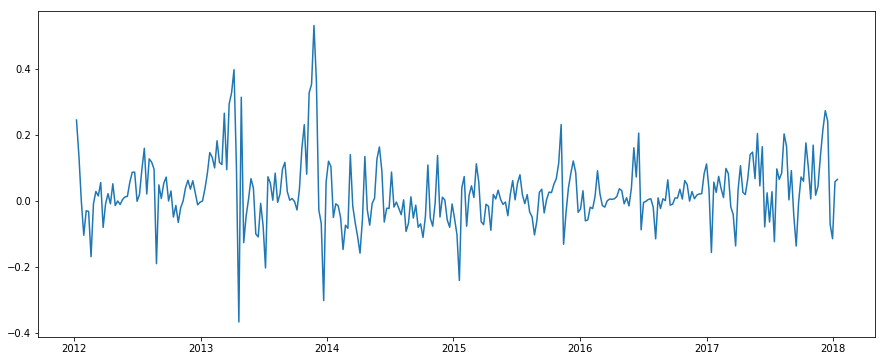

In [32]:
# remove trend and seasonality with differencing

ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.plot(ts_week_log_diff)

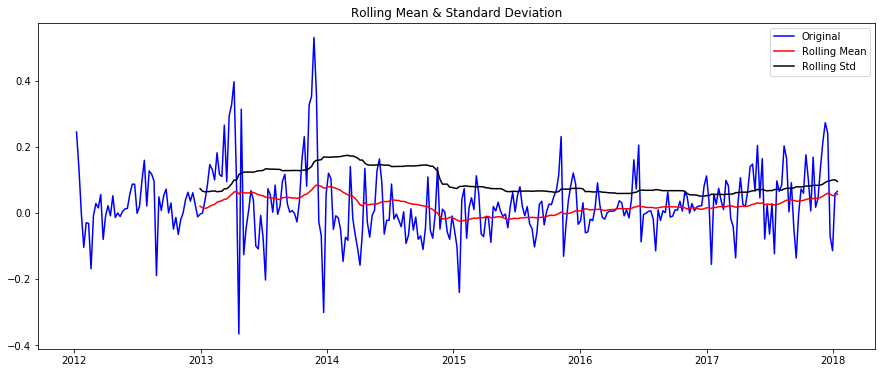

Results of Dickey-Fuller Test:
Test Statistic                -1.177937e+01
p-value                        1.043719e-21
#Lags Used                     0.000000e+00
Number of Observations Used    3.140000e+02
Critical Value (1%)           -3.451349e+00
Critical Value (5%)           -2.870789e+00
Critical Value (10%)          -2.571698e+00
dtype: float64


In [33]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)

In [34]:
size = int(len(ts_week_log)*(0.7))
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

error = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(r2)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

Printing Predicted vs Expected Values...




/home/rahulworld/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/rahulworld/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/rahulworld/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


0.9940155964043974


Printing Mean Squared Error of Predictions...
Test MSE: 0.006440


In [35]:
predictions_series = pd.Series(predictions, index = test.index)

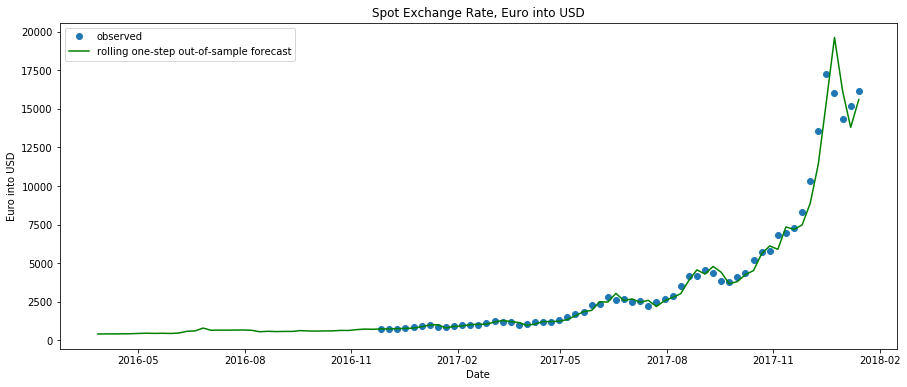

In [36]:
fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD', xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_week[-60:], 'o', label='observed')
ax.plot(np.exp(predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

In [37]:
r2

0.9940155964043974